# 七日课 大作业：实现超分

经过这几天的学习，相信大家对GAN已经有了一定的了解了，也在前面的作业中体验过GAN的一些应用了。那现在大家是不是想要升级一下难度，自己动手来训练一个模型呢？

需要自己动手训练的大作业来啦，大作业内容为基于PaddleGAN中的超分模型，实现卡通画超分。


## 安装PaddleGAN

PaddleGAN的安装目前支持Clone GitHub和Gitee两种方式：

In [4]:
%cd ~
# 安装ppgan
# 当前目录在: /home/aistudio/, 这个目录也是左边文件和文件夹所在的目录
# 克隆最新的PaddleGAN仓库到当前目录
# !git clone https://github.com/PaddlePaddle/PaddleGAN.git
# 如果从github下载慢可以从gitee clone：
# !git clone https://gitee.com/paddlepaddle/PaddleGAN.git --depth=1
# 安装Paddle GAN
%cd ~/PaddleGAN/
!pip install -v -e .

/home/aistudio
/home/aistudio/PaddleGAN
Created temporary directory: /tmp/pip-ephem-wheel-cache-u0j90o22
Created temporary directory: /tmp/pip-req-tracker-hml06ma9
Created requirements tracker '/tmp/pip-req-tracker-hml06ma9'
Created temporary directory: /tmp/pip-install-tckmai9k
Looking in indexes: https://mirror.baidu.com/pypi/simple/
Obtaining file:///home/aistudio/PaddleGAN
  Added file:///home/aistudio/PaddleGAN to build tracker '/tmp/pip-req-tracker-hml06ma9'
    Running setup.py (path:/home/aistudio/PaddleGAN/setup.py) egg_info for package from file:///home/aistudio/PaddleGAN
    Running command python setup.py egg_info
    running egg_info
    writing ppgan.egg-info/PKG-INFO
    writing dependency_links to ppgan.egg-info/dependency_links.txt
    writing entry points to ppgan.egg-info/entry_points.txt
    writing requirements to ppgan.egg-info/requires.txt
    writing top-level names to ppgan.egg-info/top_level.txt
    reading manifest file 'ppgan.egg-info/SOURCES.txt'
    writin

### 数据准备
我们为大家准备了处理好的超分数据集[卡通画超分数据集](https://aistudio.baidu.com/aistudio/datasetdetail/80790)

In [11]:
# 回到/home/aistudio/下
%cd /home/aistudio
# 解压数据
!unzip -qao data/data80790/animeSR.zip -d data/
# 将解压后的数据链接到` /home/aistudio/PaddleGAN/data `目录下
!mv -f data/animeSR PaddleGAN/data/ 

/home/aistudio



### 数据集的组成形式
```
    PaddleGAN
      ├── data
          ├── animeSR
                ├── train
                ├── train_X4
                ├── test
                └── test_X4
  ```

训练数据集包括400张卡通画，其中``` train ```中是高分辨率图像，``` train_X4 ```中是对应的4倍缩小的低分辨率图像。测试数据集包括20张卡通画，其中``` test ```中是高分辨率图像，``` test_X4 ```中是对应的4倍缩小的低分辨率图像。

### 数据可视化

In [12]:
%cd ~

/home/aistudio


训练集数据量: 400
测试集数据量: 20


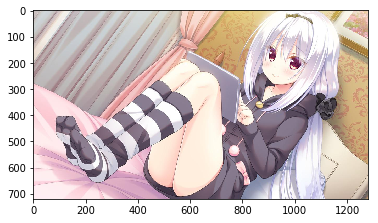

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# 训练数据统计
train_names = os.listdir('PaddleGAN/data/animeSR/train')
print(f'训练集数据量: {len(train_names)}')

# 测试数据统计
test_names = os.listdir('PaddleGAN/data/animeSR/test')
print(f'测试集数据量: {len(test_names)}')

# 训练数据可视化
img = cv2.imread('PaddleGAN/data/animeSR/train/Anime_1.jpg')
img = img[:,:,::-1]
plt.figure()
plt.imshow(img)
plt.show()

### 选择超分模型

PaddleGAN中提供的超分模型包括RealSR, ESRGAN, LESRCNN, DRN等，详情可见[超分模型](https://github.com/PaddlePaddle/PaddleGAN/blob/develop/docs/zh_CN/tutorials/super_resolution.md)。

接下来以ESRGAN为例进行演示。

### 修改配置文件
 所有模型的配置文件均在``` /home/aistudio/PaddleGAN/configs ```目录下。
 
 找到你需要的模型的配置文件，修改模型参数，一般修改迭代次数，num_workers，batch_size以及数据集路径。有能力的同学也可以尝试修改其他参数，或者基于现有模型进行二次开发，模型代码在``` /home/aistudio/PaddleGAN/ppgan/models ```目录下。
 
 以ESRGAN为例，这里将将配置文件``esrgan_psnr_x4_div2k.yaml``中的
 
 参数``total_iters``改为50000
 
 参数``dataset：train：num_workers``改为12
 
 参数``dataset：train：batch_size``改为48
 
 参数``dataset：train：gt_folder``改为data/animeSR/train
 
 参数``dataset：train：lq_folder``改为data/animeSR/train_X4
 
 参数``dataset：test：gt_folder``改为data/animeSR/test
 
 参数``dataset：test：lq_folder``改为data/animeSR/test_X4
 

### 训练模型
以ESRGAN为例，运行以下代码训练ESRGAN模型。

如果希望使用其他模型训练，可以修改配置文件名字。

In [14]:
%pwd

'/home/aistudio'

In [19]:
%cd ~/home/aistudio/PaddleGAN/
%pwd
!python -u tools/main.py --config-file configs/esrgan_psnr_x4_div2k.yaml

[Errno 2] No such file or directory: '/home/aistudio/home/aistudio/PaddleGAN/'
/home/aistudio
python: can't open file 'tools/main.py': [Errno 2] No such file or directory


### 测试模型
以ESRGAN为例，模型训练好后，运行以下代码测试ESRGAN模型。

其中``/home/aistudio/pretrained_model/ESRGAN_PSNR_50000_weight.pdparams``是刚才ESRGAN训练的模型参数，同学们需要换成自己的模型参数。

如果希望使用其他模型测试，可以修改配置文件名字。

In [20]:
%cd PaddleGAN
!python tools/main.py --config-file configs/esrgan_psnr_x4_div2k.yaml --evaluate-only --load /home/aistudio/pretrained_model/ESRGAN_PSNR_50000_weight.pdparams

/home/aistudio/PaddleGAN
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):
/home/aistudio/PaddleGAN/ppgan/engine/trainer.py:73: DeprecationWarning: invalid escape sequence \/


### 实验结果展示及模型下载
这里使用ESRGAN模型训练了一个基于PSNR指标的预测模型和一个基于GAN的预测模型。

数值结果展示及模型下载

| 方法 | 数据集 | 迭代次数 | 训练时长 | PSNR | SSIM | 模型下载 |
|---|---|---|---|---|---|---|
| ESRGAN_PSNR  | 卡通画超分数据集 | 50000 | 13.5h | 25.4782 | 0.7608 |[ESRGAN_PSNR](./pretrained_model/ESRGAN_PSNR_50000_weight.pdparams)|
| ESRGAN_GAN  | 卡通画超分数据集 | 50000 | 11h | 21.4148 | 0.6176 |[ESRGAN_GAN](./pretrained_model/ESRGAN_GAN_50000_weight.pdparams)|

可视化
| 低分辨率 | ESRGAN_PSNR | ESRGAN_GAN | GT |
|---|---|---|---|
|![](./image/Anime_401_lq.png)|![](./image/Anime_401_psnr.png)|![](./image/Anime_401_gan.png)|![](./image/Anime_401_gt.png)|
|![](./image/Anime_407_lq.png)|![](./image/Anime_407_psnr.png)|![](./image/Anime_407_gan.png)|![](./image/Anime_407_gt.png)|

